<a href="https://colab.research.google.com/github/LindaMjw/project_voting/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
! git clone -q https://github.com/LindaMjw/project_voting

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [15]:
#%%capture
# !pip3 install mapclassify

In [16]:
#from google.colab import drive
# drive.mount('/content/drive')

In [17]:
import geopandas as gpd
# import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

vdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data
#gdf = gpd.read_file('/content/drive/MyDrive/VirginiaAdministrativeBoundary_ClippedToShoreline.shp/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
# cdf = pd.read_csv('/content/project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data


## DATA

In [18]:
print(vdf.head())

   Unnamed: 0  year     state state_po county_name  county_fips        office  \
0       11161  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
1       11162  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
2       11163  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
3       11164  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
4       11165  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            5092       11925  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN            6352       11925  20220315  TOTAL  
2     RALPH NADER       GREEN             220       11925  20220315  TOTAL  
3           OTHER       OTHER             261       11925  20220315  TOTAL  
4         AL GORE    DEMOCRAT           16255       36846  20220315  TOTAL  


In [19]:
print(vdf.describe())

         Unnamed: 0         year   county_fips  candidatevotes     totalvotes  \
count   3736.000000  3736.000000   3736.000000     3736.000000    3736.000000   
mean   47061.027837  2012.826552  51264.579229     5878.282120   29116.353587   
std    23219.785408     7.589036    270.546458    18452.435802   58562.057257   
min    11161.000000  2000.000000  51001.000000        0.000000       0.000000   
25%    21235.750000  2004.000000  51069.000000       59.000000    6741.500000   
50%    49016.500000  2016.000000  51139.000000      899.000000   11629.000000   
75%    71036.250000  2020.000000  51550.000000     4548.250000   24520.750000   
max    71970.000000  2020.000000  51840.000000   355133.000000  601243.000000   

          version  
count      3736.0  
mean   20220315.0  
std           0.0  
min    20220315.0  
25%    20220315.0  
50%    20220315.0  
75%    20220315.0  
max    20220315.0  


> There is no missing values in virginia voting data, nor missing values in the other two map data.

In [21]:
# make a copy of vdf, so that the operation on vdf1 won't influence the original dataset
vdf1 = vdf.copy()
# group by year and party to get sum of candidates vote and total votes.
vdf1 = vdf.groupby(['year', 'party'])[['candidatevotes', 'totalvotes']].sum().reset_index()

# calculate the percentage votes
vdf1['percentage_votes'] = vdf1['candidatevotes'] / vdf1['totalvotes']

print(vdf1)

    year        party  candidatevotes  totalvotes  percentage_votes
0   2000     DEMOCRAT         1216422     2737915          0.444288
1   2000        GREEN           59373     2737915          0.021685
2   2000        OTHER           25243     2737915          0.009220
3   2000   REPUBLICAN         1436877     2737915          0.524807
4   2004     DEMOCRAT         1454742     3198367          0.454839
5   2004        OTHER           26666     3198367          0.008337
6   2004   REPUBLICAN         1716959     3198367          0.536824
7   2008     DEMOCRAT         1959532     3723260          0.526295
8   2008        OTHER           38723     3723260          0.010400
9   2008   REPUBLICAN         1725005     3723260          0.463305
10  2012     DEMOCRAT         1971820     3854489          0.511565
11  2012        OTHER           60147     3854489          0.015604
12  2012   REPUBLICAN         1822522     3854489          0.472831
13  2016     DEMOCRAT         1981473     398463

> By oberseving the numeric percentage votes value, we can predict that Libertrian and Green party won't appear on density plot since they only occur on 2000 and 2020 respectively.

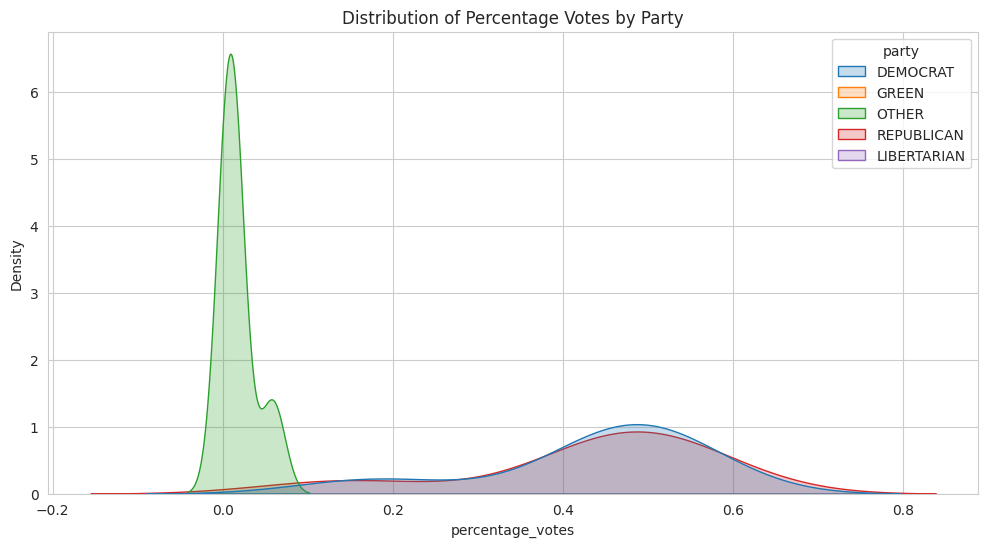

In [22]:
# Set the style of the plot
sns.set_style("whitegrid")
# Create a kernel density plot for each party
plt.figure(figsize=(12, 6))
sns.kdeplot(data=vdf1, x='percentage_votes', hue='party', fill=True, warn_singular=False)
plt.title('Distribution of Percentage Votes by Party')
plt.show()

> This data provides insight into the distribution and variation of 'percentage_votes' for each 'party' over time. The Green Party's percentage of votes is relatively low compared to the other two parties and remains consistent over time. The percentage of votes for the Democratic Party is very close to that of the Republican Party. The higher density of Democratic votes around 0.5 suggests that the Democratic Party has won more times in Virginia in the past six elections. By checking the real election results, we can see that the Republican Party won in 2000 and 2004, while the Democratic Party emerged victorious in the remaining four elections.

## Analysis

In [23]:
countyE1 = pd.read_csv('/content/project_voting/data/county_data/0002_ds176_20105_county_E.csv')
print(countyE1.head())

   Unnamed: 0  X.2  X.1  X              GISJOIN            YEAR  \
0           1    1    1  1  GIS Join Match Code  Data File Year   
1           2    2    2  2             G0100010       2006-2010   
2           3    3    3  3             G0100030       2006-2010   
3           4    4    4  4             G0100050       2006-2010   
4           5    5    5  5             G0100070       2006-2010   

                      STUSAB      REGIONA      DIVISIONA       STATE  ...  \
0  State Postal Abbreviation  Region Code  Division Code  State Name  ...   
1                         AL          NaN            NaN     Alabama  ...   
2                         AL          NaN            NaN     Alabama  ...   
3                         AL          NaN            NaN     Alabama  ...   
4                         AL          NaN            NaN     Alabama  ...   

              JSDE003             JSDE004             JSDE005  \
0  Built 2000 to 2004  Built 1990 to 1999  Built 1980 to 1989   
1   